**IMPORTING LIBRARIES**

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split #For training the dataset
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [78]:
!pip install xgboost

**READING THE DATASET**

In [80]:
data = pd.read_csv('data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [82]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [83]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [84]:
data.dropna()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


**EXPLORATORY DATA ANALYSIS (EDA)**

*Now we are converting or droping them (date, address and city) so the heatmap can be generated without errors.This is because correlation heatmaps require numeric datas only, not text*

In [85]:
# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract numeric features
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Drop original date column
data = data.drop('date', axis=1)


In [86]:
# Drop non-numeric text columns that cannot be used
text_cols = ['address', 'street', 'addr', 'neighbourhood']
data = data.drop(columns=[col for col in text_cols if col in data.columns])

In [87]:
# 1. Convert date columns (if any)
for col in data.columns:
    if "date" in col.lower():
        data[col] = pd.to_datetime(data[col], errors='ignore')

# 2. Convert datetime columns to year/month/day
for col in data.columns:
    if data[col].dtype == 'datetime64[ns]':
        data[col + '_year'] = data[col].dt.year
        data[col + '_month'] = data[col].dt.month
        data[col + '_day'] = data[col].dt.day
        data = data.drop(col, axis=1)

# 3. One-hot encode all remaining object (text) columns
cat_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

***Now plotting the graph***

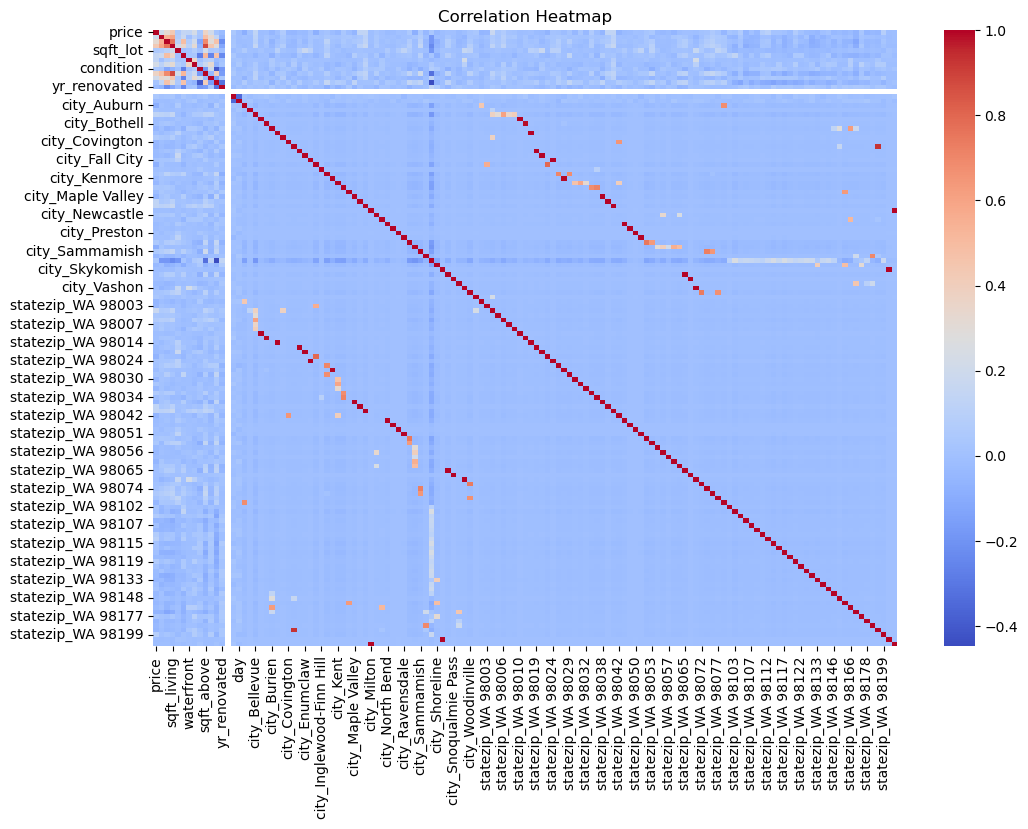

In [88]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap = 'coolwarm', annot = False)
plt.title("Correlation Heatmap")
plt.show()

**DISTRIBUTION OF TARGET VARIABLE (PRICE)**

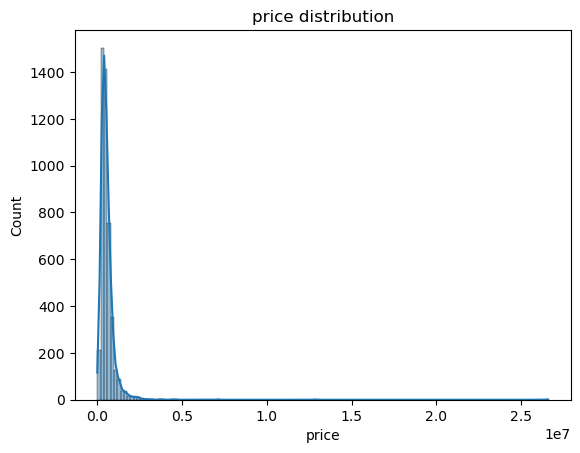

In [89]:
sns.histplot(data["price"], kde = True)
plt.title("price distribution")
plt.show()

**SELECTING FEATURES & TARGET**

*Assuming dataset has:

*sqft_living*

*bedrooms*

*bathrooms*

*floors*

*age*

*location (categorical)*

*price (target)*

In [90]:
X = data.drop("price", axis = 1)
y = data["price"]
X = pd.get_dummies(X,drop_first = True)

**TRAIN-TEST SPLIT**

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

**SCALING THE DATA**

In [92]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**TRAINING MODELS**

***MODEL 1 : LINEAR REGESSION***

In [93]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

pred_linear_model = linear_model.predict(X_test)

print("Linear Regression RMSE:", 
      np.sqrt(mean_squared_error(y_test, pred_linear_model)))
print("R2 Score", r2_score(y_test, pred_linear_model))

Linear Regression RMSE: 981455.3815551021
R2 Score 0.05549039289453994


***MODEL 2 : LASSO REGRESSION***

In [94]:
lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_train, y_train)

pred_lasso_model = lasso_model.predict(X_test)

print("Lasso RMSE:", 
      np.sqrt(mean_squared_error(y_test, pred_lasso_model)))
print("R2 Score", r2_score(y_test, pred_lasso_model))

Lasso RMSE: 981452.3647719651
R2 Score 0.05549619932513228


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.869e+13, tolerance: 5.229e+10
  model = cd_fast.enet_coordinate_descent(


***MODEL 3: RANDOM FOREST REGRESSOR***

In [95]:
rf_model = RandomForestRegressor(n_estimators = 200, random_state = 42)
rf_model.fit(X_train, y_train)

pred_rf_model = rf_model.predict(X_test)

print("Random Forest RMSE:", 
      np.sqrt(mean_squared_error(y_test, pred_rf_model)))
print("R2 Score", r2_score(y_test, pred_rf_model))

Random Forest RMSE: 985057.7231183498
R2 Score 0.04854419755786543


***MODEL 4: XGBOOST REGRESSOR***

In [96]:
xgb_model = XGBRegressor(n_estimators = 300, learning_rate = 0.05, random_state = 42)
xgb_model.fit(X_train, y_train)

pred_xgb_model = xgb_model.predict(X_test)

print("XGBoost RMSE:", 
      np.sqrt(mean_squared_error(y_test, pred_xgb_model)))
print("R2 Score", r2_score(y_test, pred_xgb_model))

XGBoost RMSE: 978268.514124846
R2 Score 0.06161423725221493


**COMBINING ALL THE MODELS**

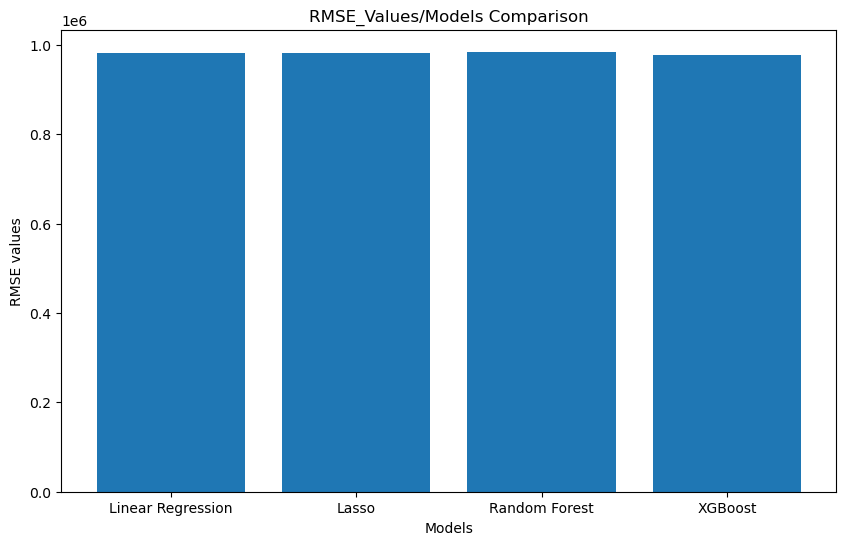

In [97]:
models = ["Linear Regression", "Lasso", "Random Forest", "XGBoost"]
rmse_scores = [
    np.sqrt(mean_squared_error(y_test, pred_linear_model)),
    np.sqrt(mean_squared_error(y_test, pred_lasso_model)),
    np.sqrt(mean_squared_error(y_test, pred_rf_model)),
    np.sqrt(mean_squared_error(y_test, pred_xgb_model))
]
plt.figure(figsize = (10,6))
plt.bar(x = models, height = rmse_scores)
plt.title("RMSE_Values/Models Comparison")
plt.xlabel("Models")
plt.ylabel("RMSE values")
plt.show()

*Here the graph is almost same for every models and as a result we cannot choose our best model for the project. So we will use r2 scores instead of RMSE Scores for better selection of model*

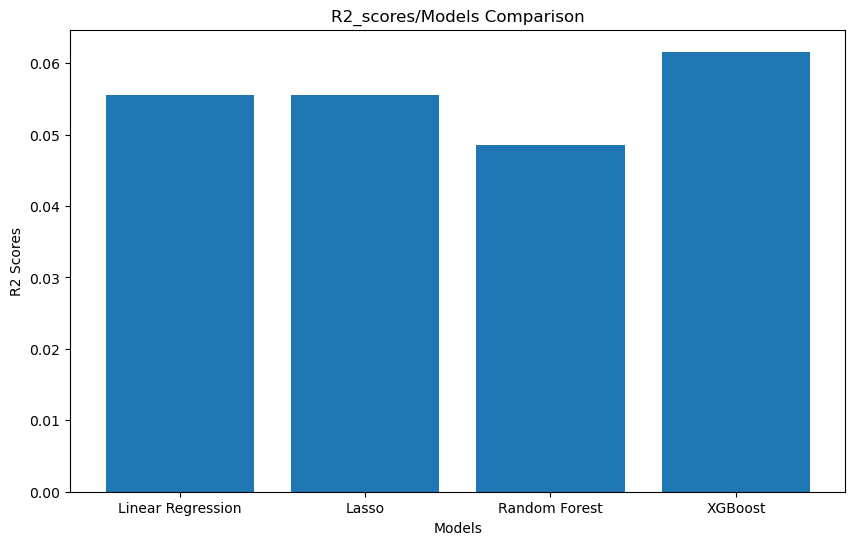

In [98]:
models = ["Linear Regression", "Lasso", "Random Forest", "XGBoost"]
r2_scores = [
    r2_score(y_test, pred_linear_model),
    r2_score(y_test, pred_lasso_model),
    r2_score(y_test, pred_rf_model),
    r2_score(y_test, pred_xgb_model)
]
plt.figure(figsize = (10,6))
plt.bar(x = models, height = r2_scores)
plt.title("R2_scores/Models Comparison")
plt.xlabel("Models")
plt.ylabel("R2 Scores")
plt.show()

***XGBoost*** *model performs best*

**CHOOSING THE BEST MODEL(XGBOOST MODEL)**

*We have used PICKLE Library as it is used to save and load ML Models*

In [99]:
import pickle
model = pickle.dump(xgb_model, open("House_price_prediction.pkl", "wb"))
scaler = pickle.dump(scaler, open("scaler.pkl", "wb"))

**PREDICTION ON NEW DATA**

In [100]:
My_new_house_data = {
    "sqft_living" : 16000,
    "sqft_lot" : 13000,
    "bedrooms" : 2,
    "bathrooms" : 1,
    "floors" : 2,
    "waterfront" : 0,
    "view" : 4,
    "sqft_above" : 12000,
    "sqft_basement" : 4000
}

new_df = pd.DataFrame([My_new_house_data])
new_df_dummies = pd.get_dummies(new_df, drop_first = True)
new_df_dummies = new_df_dummies.reindex(columns = X.columns, fill_value = 0)

scaler = StandardScaler()
scaler.fit(X)

new_df_scaled = scaler.transform(new_df_dummies)

predicted_price = xgb_model.predict(new_df_scaled)[0]

print("Predicted House Price:", predicted_price)

Predicted House Price: 2.3471848e+06


In [101]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       ...
       'statezip_WA 98155', 'statezip_WA 98166', 'statezip_WA 98168',
       'statezip_WA 98177', 'statezip_WA 98178', 'statezip_WA 98188',
       'statezip_WA 98198', 'statezip_WA 98199', 'statezip_WA 98288',
       'statezip_WA 98354'],
      dtype='object', length=134)

**MODEL ACCURACY PREDICTION**

In [103]:
from sklearn.metrics import accuracy_score

pred_xgb_model_classes = (pred_xgb_model > 0.5).astype(int)
y_test_binary = (y_test > 0.5).astype(int)
accuracy = accuracy_score(y_test_binary, pred_xgb_model_classes)  
print(f"Accuracy : {accuracy:.4f}")

Accuracy : 0.9902
